# RAO3 Algorithm

Name : Dawwi Raissa Damarjati Muljana
SID : 1301213517

# Kode

In [156]:
#importing
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Fungsi F14 

In [157]:
def F14(x):
    aS = np.array([
        [-32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32],
        [-32, -32, -32, -32, -32, -16, -16, -16, -16, -16, 0, 0, 0, 0, 0, 16, 16, 16, 16, 16, 32, 32, 32, 32, 32]
    ])
    # Ensure x is reshaped to (2, 1)
    x = x.reshape(2, 1)
    bS = np.sum((x - aS) ** 6, axis=0)
    return (1 / 500 + np.sum(1 / (np.arange(1, 26) + bS))) ** -1

# Parameters

In [158]:
pop_size = 25
iterations = 100
bounds = [-50, 100]

In [159]:
# Inisialisasi populasi awal secara acak
np.random.seed(20)
population = np.random.uniform(bounds[0], bounds[1], (pop_size, 2))

In [160]:
# Function to calculate fitness
def calculate_fitness(population):
    return np.array([F14(individual) for individual in population])

In [161]:
fitness = calculate_fitness(population)
print(fitness)

[499.9999443  499.99997236 499.99708248 497.04746555 499.97455155
 499.99697359 499.9999484  499.9996359  499.99915543 459.57115275
 499.99998679 497.64375593 499.99934955 499.99988368 497.68451343
 499.99621719 498.94618008 499.99934828 489.93711954 491.66790386
 499.90838199 496.93616127 492.5928775  498.84281532 499.99979674]


# RAO3 Alogrithm

In [162]:
# Define the RAO3 algorithm

# Run RAO3

In [163]:
def RAO3(pop_size, iterations, bounds, fobj):
    # Initialize population
    population = np.random.uniform(bounds[0], bounds[1], (pop_size, len(bounds)))
    best_sol = population[np.argmin([fobj(ind) for ind in population])]
    worst_sol = population[np.argmax([fobj(ind) for ind in population])]
    
    history = [population.copy()]
    
    for _ in range(iterations):
        for i in range(pop_size):
            k = np.random.randint(pop_size)
            r1, r2 = np.random.random(), np.random.random()
            
            if fobj(population[i]) < fobj(population[k]):
                new_sol = population[i] + r1 * (best_sol - np.abs(worst_sol)) + r2 * (np.abs(population[i]) - population[k])
            else:
                new_sol = population[i] + r1 * (best_sol - np.abs(worst_sol)) + r2 * (np.abs(population[k]) - population[i])
            
            new_sol = np.clip(new_sol, bounds[0], bounds[1])
            
            if fobj(new_sol) < fobj(population[i]):
                population[i] = new_sol
                
        best_sol = population[np.argmin([fobj(ind) for ind in population])]
        worst_sol = population[np.argmax([fobj(ind) for ind in population])]
        history.append(population.copy())
    
    return history, best_sol

# Call the RAO3 function with the F14 function as the objective function
history, best_solution = RAO3(pop_size, iterations, bounds, F14)

# Output the best solution found
print("Best solution:", best_solution)


Best solution: [-31.83670231 -31.81176836]


# Plotting solution space

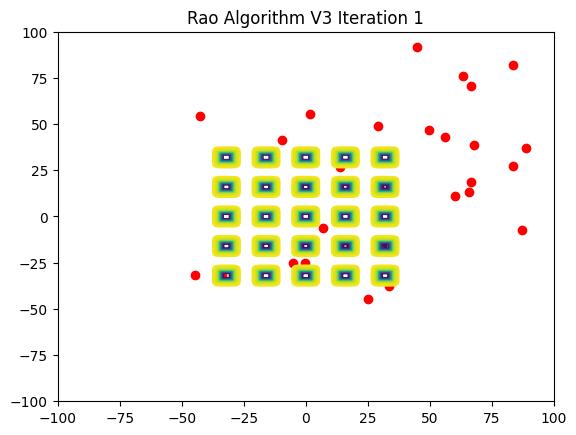

In [164]:
# Prepare contour plot data
bounds = (-100, 100)
X1 = np.linspace(bounds[0], bounds[1], 400)
X2 = np.linspace(bounds[0], bounds[1], 400)
X1, X2 = np.meshgrid(X1, X2)
Z = np.array([F14(np.array([x1, x2])) for x1, x2 in zip(X1.ravel(), X2.ravel())]).reshape(X1.shape)

# Set up the plot and axes for animation
fig, ax = plt.subplots()
ax.set_xlim(bounds[0], bounds[1])
ax.set_ylim(bounds[0], bounds[1])
contour = ax.contour(X1, X2, Z, levels=50)
scatter = ax.scatter([], [], c='red')  # Solution candidates

# Update function for animation
def update(frame):
    positions = history[frame]
    scatter.set_offsets(positions)
    ax.set_title(f'Rao Algorithm V3 Iteration {frame + 1}')
    return scatter,

ani = FuncAnimation(fig, update, frames=len(history), blit=True, repeat=False)
plt.show()

# Saving GIF

In [165]:
# Manage run count
run_count_file = 'run_count_gen3.txt'

# Read current run count
try:
    with open(run_count_file, 'r') as f:
        run_count = int(f.read().strip())
except FileNotFoundError:
    run_count = 0

# Increment run count
run_count += 1

# Save new run count
with open(run_count_file, 'w') as f:
    f.write(str(run_count))

# Save the animation as a GIF with incremented name
gif_filename = f'RAO3-Gen3-V2.{run_count}..gif'
ani.save(gif_filename, writer=PillowWriter(fps=5))

plt.show()